# Multi-armed bandit: a classic RL problem. <br>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(1693)
# np.random.normal() is a different function from random.normal()
# np is a library. random is a different library.
# np library has a module called random.


In [ ]:
# Declare global variables
n = 2 # number of arms
arms = [.5, .7] # probability of getting a banana from each arm
eps = 0.2 # epsilon is the probability of exploration action (which means 80% exploitation)

In [ ]:
arms[0]

0.5

In [ ]:
arms[1]

0.7

In [ ]:
# Define the environment (world) that generates the reward function
# This model of the environment may or may not be visible (or known) to the agent
# This reward function simulates randomly generated reward for an arm (with a given prob)
# For each arm, you try 5 times, and generate a random float every time.
# If this random number is less than the probability of that arm, you'll add a 1 to the reward.
# After all iterations, you'll have a reward value between 0 to 5.
def reward(prob): # prob is the probability of a given arm
    n_iterations = 5
    reward = 0
    for i in range(n_iterations):
        if random.random() < prob:
            reward += 1
    return reward

In [ ]:
# Try the reward function with different prob input values
reward(arms[1])

3

In [ ]:
# Initialize memory array (Q-Table) (2xk matrix) for storing action (arm) -value (reward) pairs (av)
# memory array stores history of all actions & rewards
# eacg row = an index reference to the arms array (1st element), and the reward received (2nd element)
# Example: row x = [1, 8] means
# action 1 was taken (the 2nd element in our arms array)
# you received a reward of 8 for taking that action
# has 1 row defaulted to random action index

# Use arm 0 as starting point
starting_arm=1
starting_reward=0
av = np.array([starting_arm, starting_reward]).reshape(1,2)
# av should be of dimension 1 row x 2 columns
# element 1 = reference to arms array = a randomly chosen integer between 0 and n+1
# element 2 = reward = initial value of zero
av

array([[1, 0]])

In [ ]:
# Define greedy policy (100% exploitation) for the agent (monkey) to select best arm based on memory array (Q-table)
# best arm is defined as the arm that gives the most bananas on average
# input argument a = memory array (av from above)
def bestArm(a):
    bestArm = 1 #default to 0
    bestMean = 0 # the curerent bestMean
    for u in a: # Iterate through each record of av [a,v]
      # u[0] = action ID (arm 0 or arm 1)
      # u[1] = reward (value)
      this_action=a[np.where(a[:,0] == u[0])] # Select all records with action u[0] (column 0) and save them into a new matrix called "this_action"
      avg = np.mean(this_action[:, 1]) # Calculate mean reward for this action (reward value is in column 1)
      #print('avg = '+str(avg))
      if bestMean < avg:
          bestMean = avg
          bestArm = u[0]
    return bestArm


In [ ]:
av

array([[1, 0]])

In [ ]:
# Exploitation only: Main loop for each play
n_trials=50
for i in range(n_trials):
    this_choice = bestArm(av) # Retrieve the best arm
    this_prob = arms[this_choice]
    this_reward = reward(this_prob)
    # add our new record to our memory log av
    thisAV = np.array([[this_choice, this_reward]]) # Make an np array using this choice and reward
    av = np.concatenate((av, thisAV), axis=0) # add the array from above to the av memory array as a new row

print(av)

[[1 0]
 [1 3]
 [1 2]
 [1 4]
 [1 5]
 [1 4]
 [1 4]
 [1 3]
 [1 4]
 [1 3]
 [1 3]
 [1 2]
 [1 3]
 [1 4]
 [1 4]
 [1 2]
 [1 5]
 [1 3]
 [1 4]
 [1 5]
 [1 4]
 [1 4]
 [1 2]
 [1 3]
 [1 4]
 [1 5]
 [1 3]
 [1 3]
 [1 3]
 [1 4]
 [1 4]
 [1 5]
 [1 3]
 [1 2]
 [1 5]
 [1 4]
 [1 5]
 [1 2]
 [1 4]
 [1 3]
 [1 5]
 [1 4]
 [1 4]
 [1 3]
 [1 2]
 [1 2]
 [1 4]
 [1 4]
 [1 3]
 [1 4]
 [1 4]
 [1 4]
 [1 4]
 [1 3]
 [1 4]
 [1 4]
 [1 4]
 [1 4]
 [1 4]
 [1 3]
 [1 1]
 [1 3]
 [1 3]
 [1 3]
 [1 4]
 [1 3]
 [1 4]
 [1 3]
 [1 4]
 [1 2]
 [1 3]
 [1 4]
 [1 4]
 [1 2]
 [1 4]
 [1 4]
 [1 3]
 [1 5]
 [1 2]
 [1 5]
 [1 3]
 [1 5]
 [1 3]
 [1 4]
 [1 4]
 [1 3]
 [1 4]
 [1 5]
 [1 4]
 [1 4]
 [1 3]
 [1 5]
 [1 4]
 [1 5]
 [1 4]
 [1 2]
 [1 2]
 [1 3]
 [1 2]
 [1 4]
 [1 3]
 [1 4]
 [1 2]
 [1 2]
 [1 4]
 [1 2]
 [1 4]
 [1 4]
 [1 2]
 [1 5]
 [1 5]
 [1 3]
 [1 4]
 [1 2]
 [1 3]
 [1 5]
 [1 3]
 [1 1]
 [1 2]
 [1 4]
 [1 5]
 [1 4]
 [1 4]
 [1 4]
 [1 4]
 [1 4]
 [1 4]
 [1 3]
 [1 2]
 [1 4]
 [1 4]
 [1 3]
 [1 3]
 [1 4]
 [1 4]
 [1 2]
 [1 3]
 [1 5]
 [1 2]
 [1 2]
 [1 3]
 [1 5]
 [1 3]

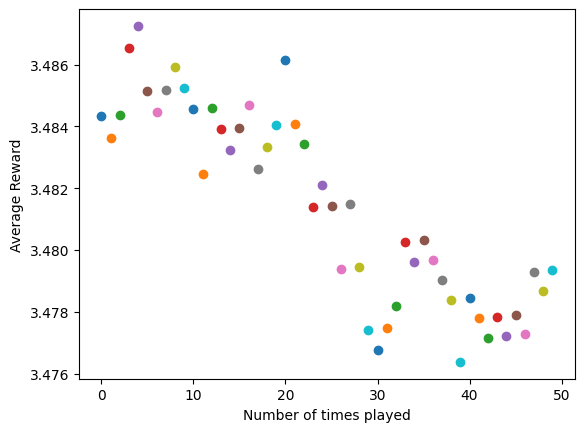

In [ ]:
# Prep a matplotlib scatter plot of the mean reward against the number of times the game is played.
plt.xlabel("Number of times played")
plt.ylabel("Average Reward")

# Exploitation only: Main loop for each play
for i in range(n_trials):
    choice = bestArm(av) # retrieve the best arm
    thisAV = np.array([[choice, reward(arms[choice])]])
    av = np.concatenate((av, thisAV), axis=0)
    #calculate the mean reward
    runningMean = np.mean(av[:,1])
    plt.scatter(i, runningMean)


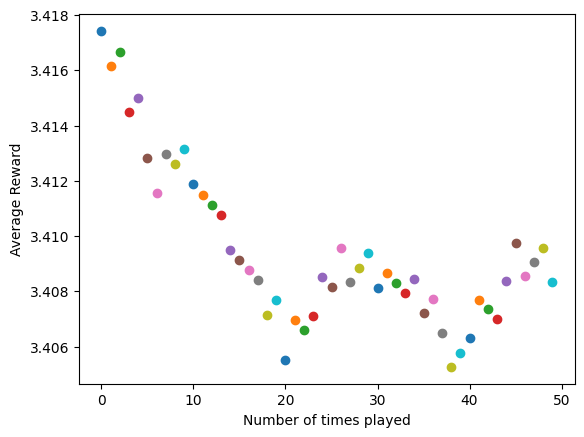

In [ ]:
# Epsilon greedy policy
# with eps of .2 (% for exploration)
# which means that 20% of the time we will explore (meaning picking a random arm instead of best arm)
# which also means that 80% the time we will just pick the best arm
n_trials = 50
eps=.5

# Prep a matplotlib scatter plot of the mean reward against the number of times the game is played.
plt.xlabel("Number of times played")
plt.ylabel("Average Reward")

# Main loop for each play
for i in range(n_trials):
    # random.random() gives me a random value between 0 ~ 1
    if random.random() > eps: # exploitation
        choice = bestArm(av) # retrieve the best arm
        thisAV = np.array([[choice, reward(arms[choice])]])
        av = np.concatenate((av, thisAV), axis=0) # add the new trial to my av history/memory array
    else: #exploration
        choice = np.where(arms == np.random.choice(arms))[0][0] # pick a random arm
        thisAV = np.array([[choice, reward(arms[choice])]]) #choice, reward
        av = np.concatenate((av, thisAV), axis=0) #add to our action-value memory array
    #calculate the mean reward
    runningMean = np.mean(av[:,1]) # calculate average of rows so far in column 1 (reward value)
    plt.scatter(i, runningMean)


In [ ]:
av

array([[1, 0],
       [1, 3],
       [1, 2],
       ...,
       [1, 3],
       [1, 4],
       [1, 3]])